# Step 1: Import & Fetch Data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

df = fetch_california_housing(as_frame=True)
df.frame.head


<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

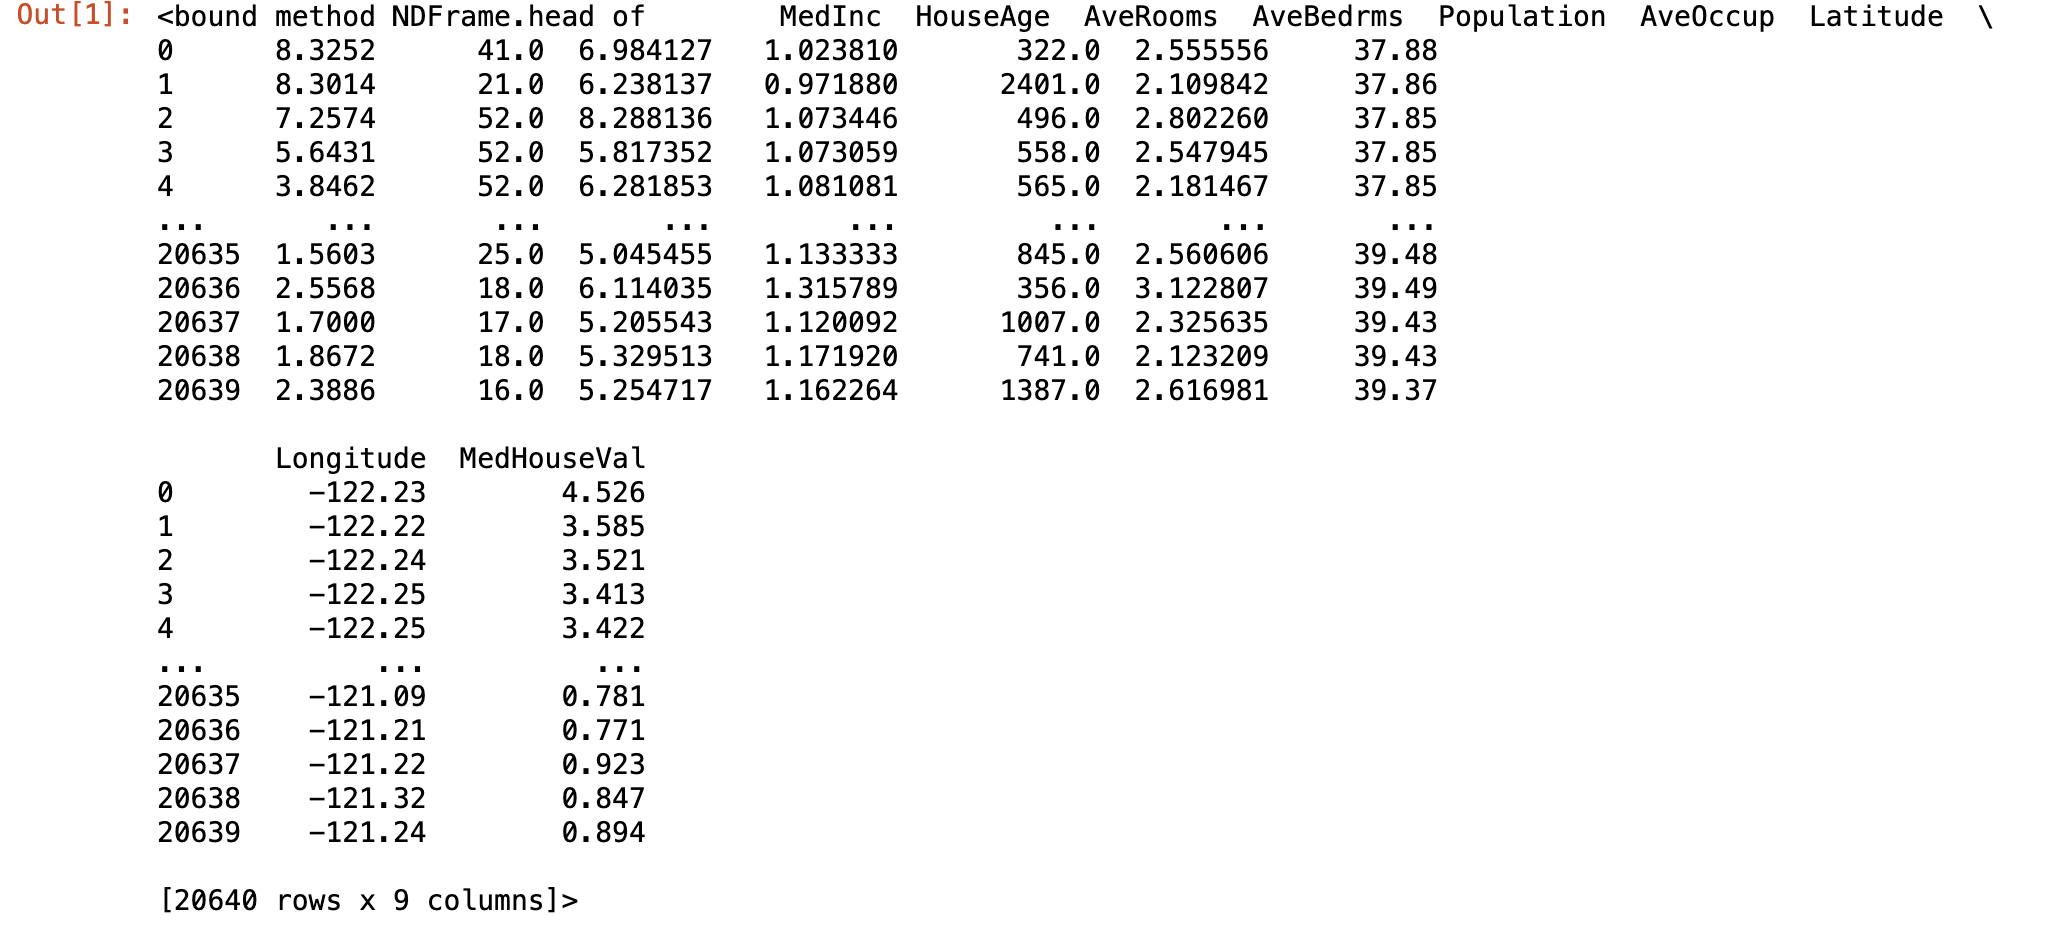

# Step 2: Plot 6 histograms of 6 features


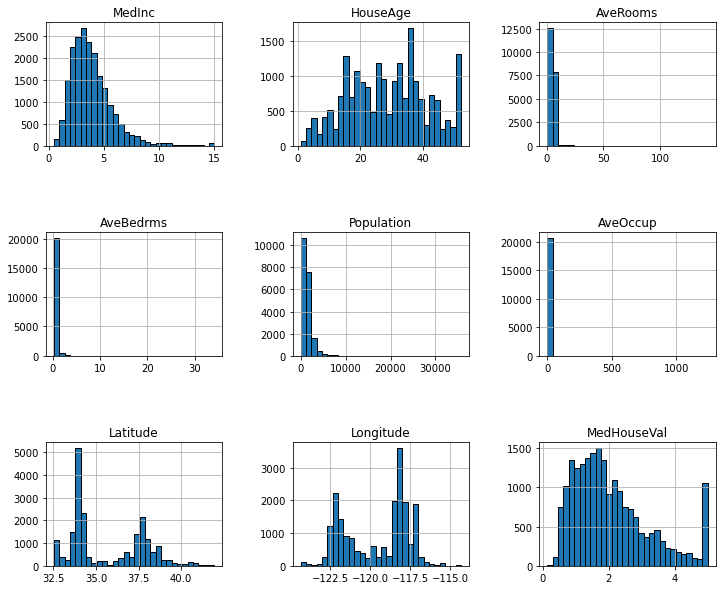

In [2]:
import matplotlib.pyplot as plt

df.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

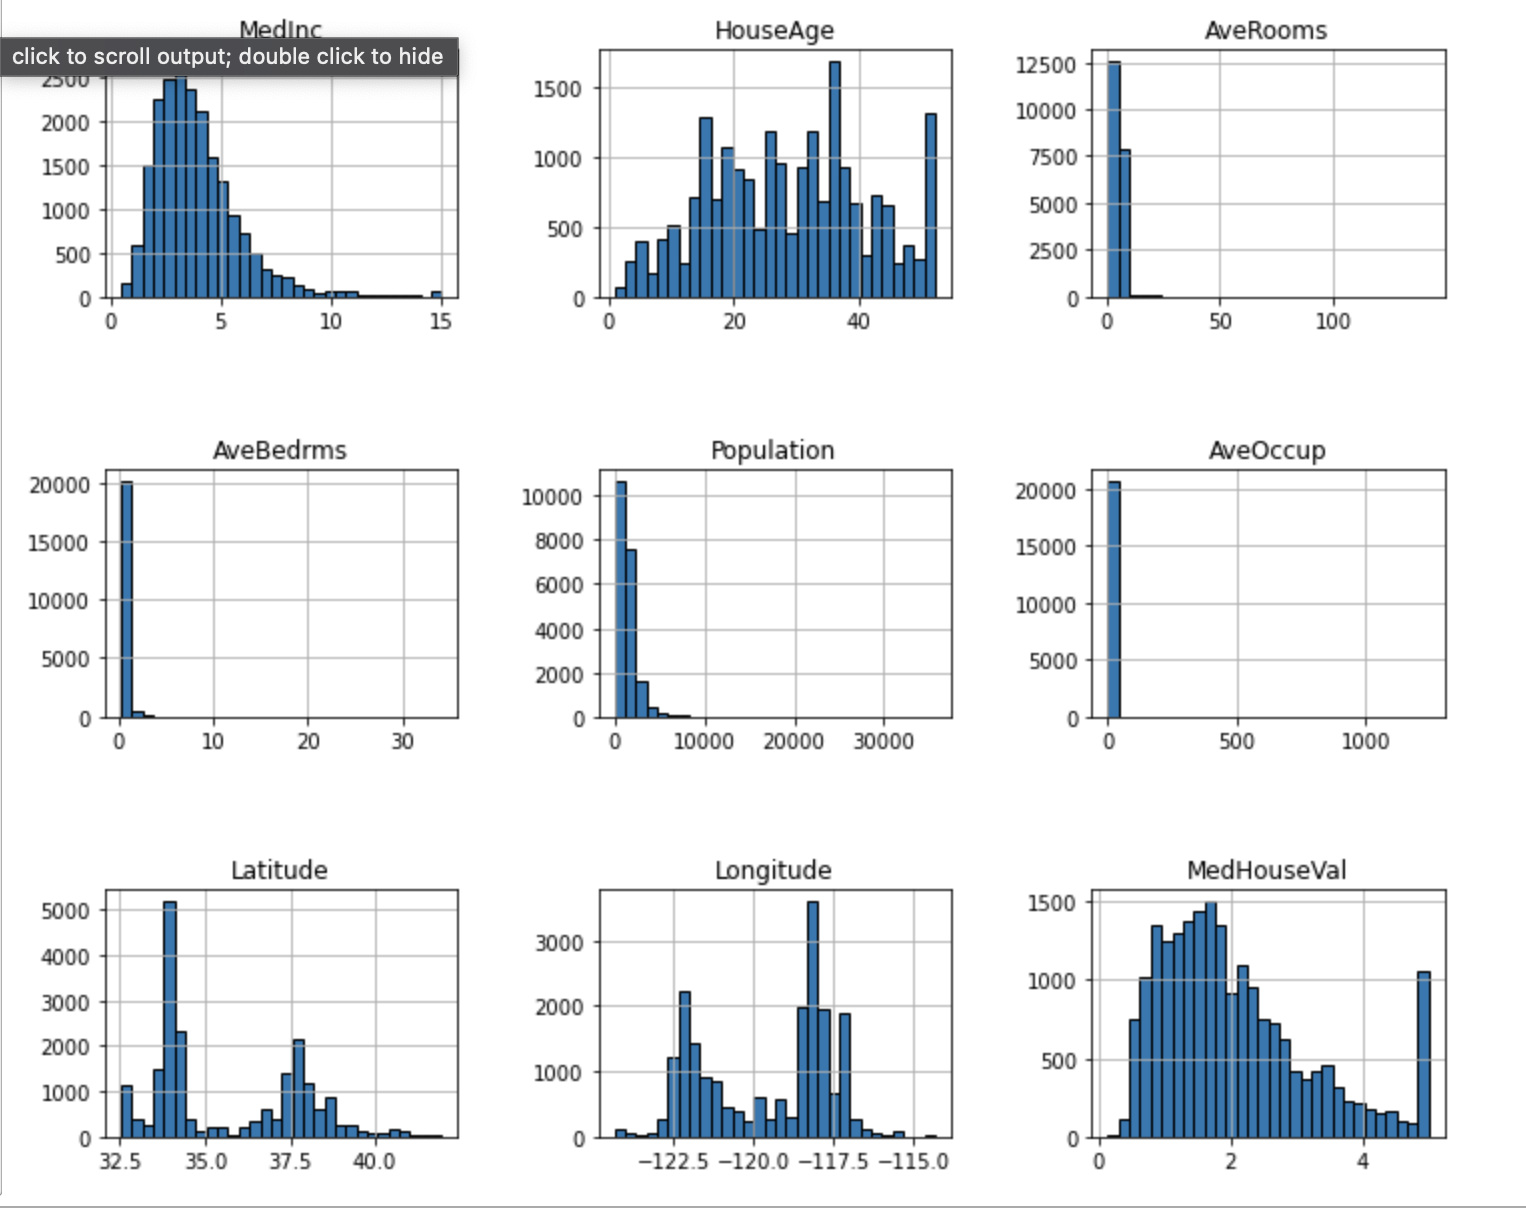

# Step 3: Plot the housing value with respect to longitude and latitude

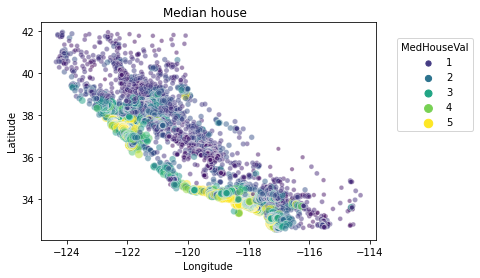

In [17]:
import seaborn as sns

sns.scatterplot(
    data=df.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house  ")

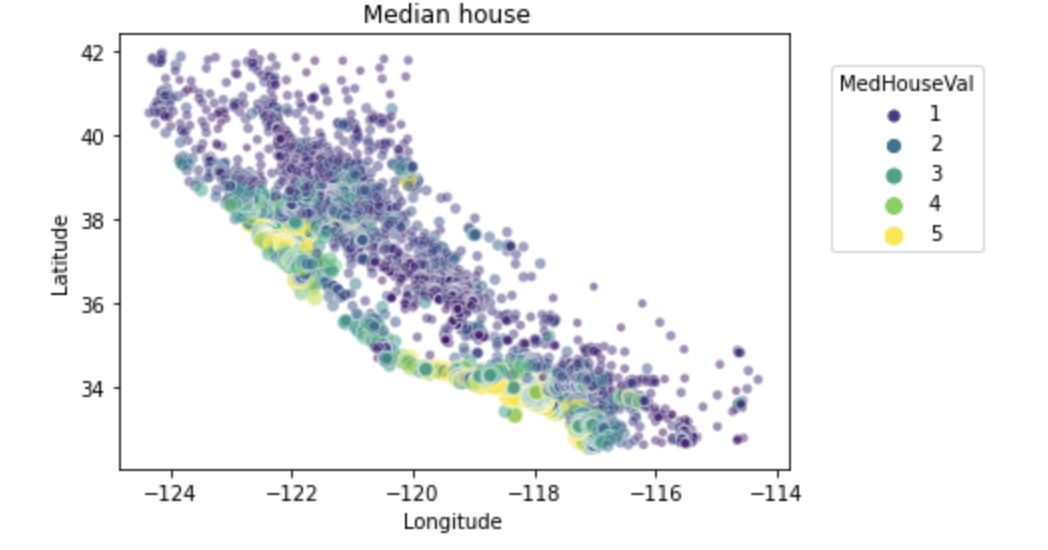

# Step 4. Plot the correlation between the features against each other


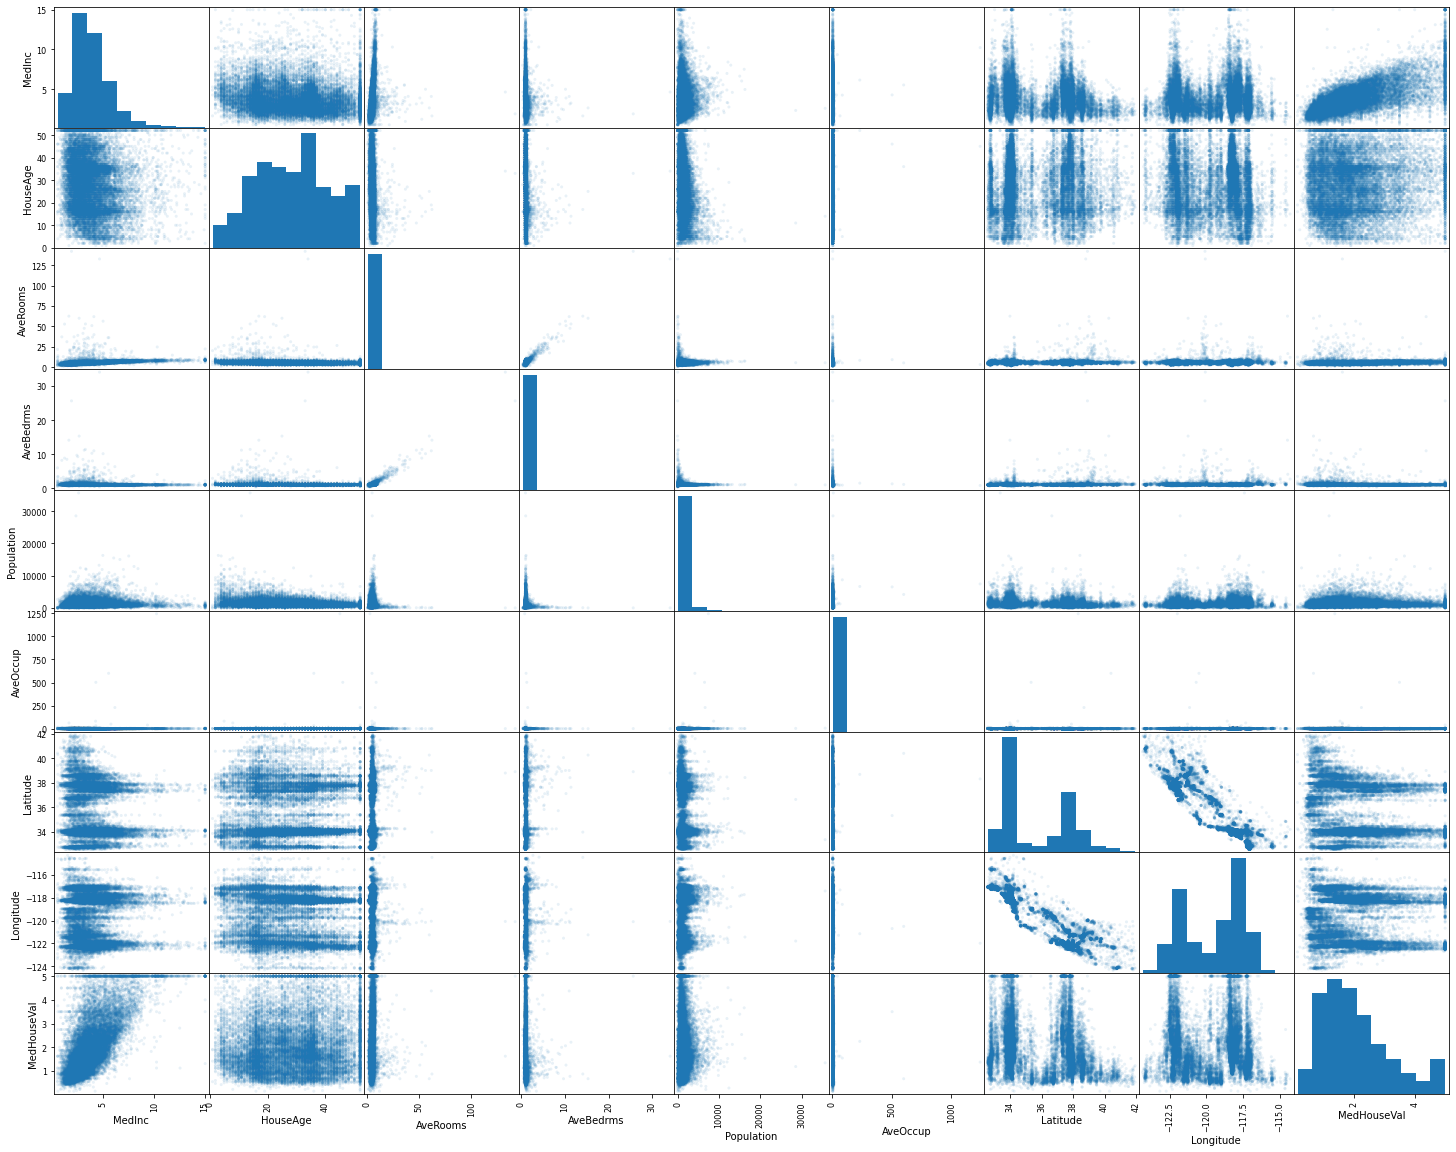

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df.frame, alpha=0.1, figsize=(25, 20));

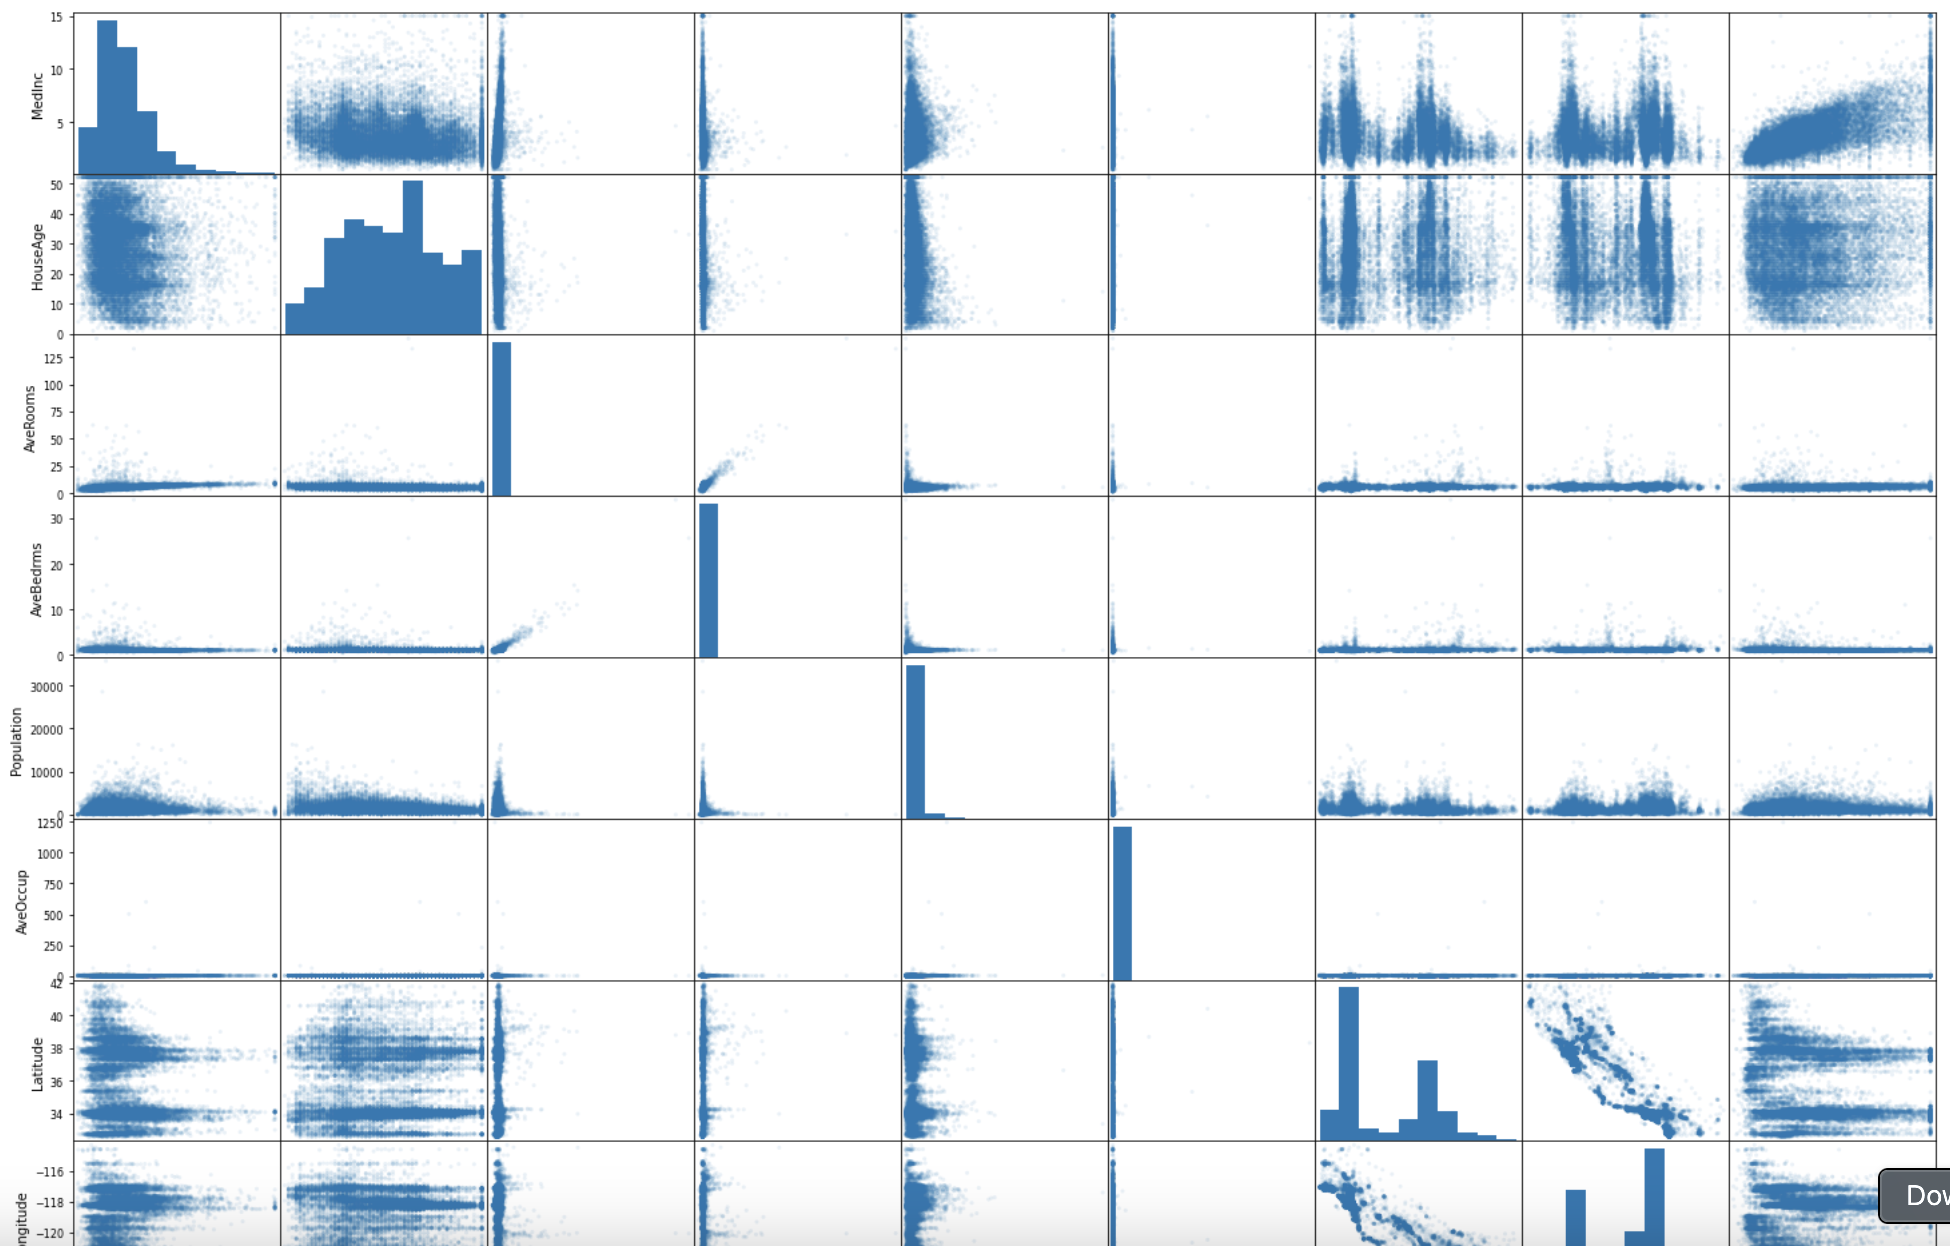

# Step 5. Find strongest correlation


In [5]:
corr_matrix = df.frame.corr() 
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

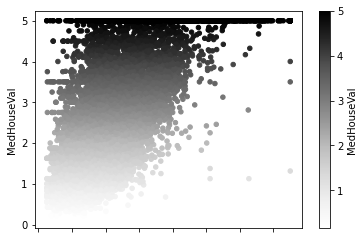

In [18]:
data= df.frame
data.plot(kind='scatter', x='MedInc', y='MedHouseVal', c='MedHouseVal');

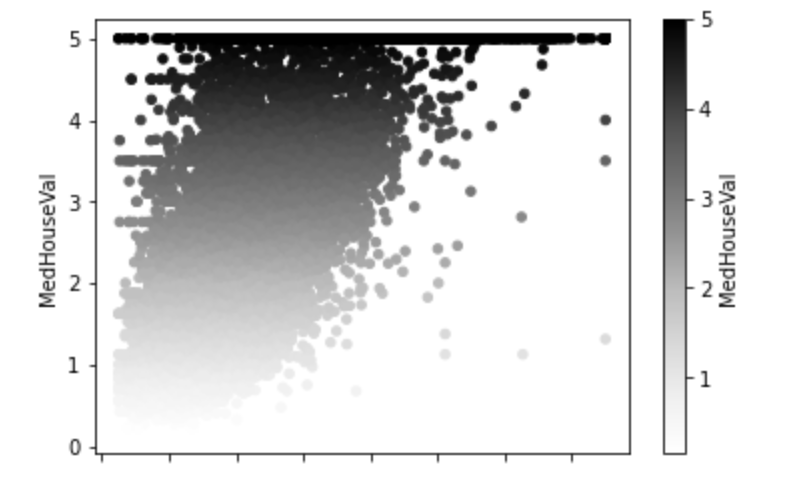

# Step 6. Split dataset & Fitting the models


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X = df.frame.drop('MedHouseVal', axis=1)
y = df.frame['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
model_1 = DecisionTreeRegressor()
model_1.fit(X_train, y_train)


DecisionTreeRegressor()

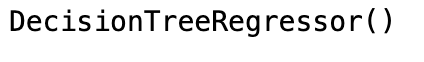

# Step 7. Prediction and Evaluation


In [13]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.5802365532183009

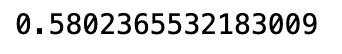

In [15]:
y_preds_1 = model_1.predict(X_test)
r2_score(y_test, y_preds_1)

0.9085878585915856

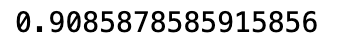